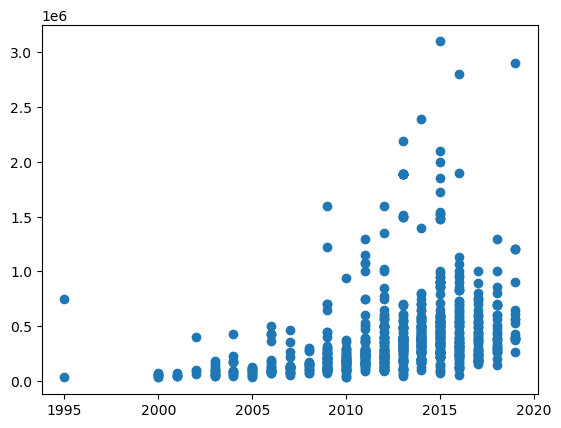

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import pickle


# cleaning


df = pd.read_csv(r'C:\Users\saad\Downloads\quikr_car.csv')
df = df.dropna()
df = df[(df['year'].str.isnumeric()==True)]
df['year'] = df['year'].astype(int)
df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].str.replace(',', '').astype(int)
df = df[df['kms_driven'].str.isalpha() == False]
df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',','').astype(int)
df['name'] = df['name'].str.split().str.slice(0,3).str.join(" ")
df = df.reset_index(drop=True)
newdf = df[df['Price']< 6e6]


### outliers 


highest = df['Price'].mean() + 3*df['Price'].std()
lowest  = df['Price'].mean() - 3*df['Price'].std()
df = df[(df['Price']< highest) & (df['Price']> lowest)]
plt.scatter(newdf['year'] , newdf['Price'])
df


### piplelines ,columns tranforamtion , model trainging


x = df.drop(columns = ['Price'])
y = df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2 , random_state = 151)

transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)

pipeline = make_pipeline(transformer, LinearRegression())

pipeline.fit(X_train, Y_train)

pred = pipeline.predict(X_test)
r2_score(Y_test ,pred )
pickle.dump(pipeline ,open("model.pkl" , 'wb') )










        
